In [16]:
import pandas as pd
import numpy as np

# USING IMPORT EMAILS TO PARSE THORUGH MESSAGES
import email
from email.parser import Parser

import unicodedata
import re
import json
import os

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd
from time import strftime
#from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Intensity Score (sentiment score)
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Polarity / Subjectivity scores
from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('01-clean_data.csv', index_col=False)

df.head()

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
0,allen-p/_sent_mail/1.,NaN,phillip.allen@enron.com,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,here is our forecast,here is our forecast,forecast,forecast,0.0000,0.00,0.000000,False,True
1,allen-p/_sent_mail/10.,Re:,phillip.allen@enron.com,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True
2,allen-p/_sent_mail/100.,Re: test,phillip.allen@enron.com,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,test successful way to go,test successful way to go,test successful way go,test successful way go,0.5859,0.75,0.950000,False,True
3,allen-p/_sent_mail/1000.,NaN,phillip.allen@enron.com,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",randy can you send me a schedule of the sala...,randy can you send me a schedule of the salary...,randy send schedule salary level everyone sche...,randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True
4,allen-p/_sent_mail/1001.,Re: Hello,phillip.allen@enron.com,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True


In [3]:
df[['content', 'date', 'sender', 'subject']].head()

,content,date,sender,subject
0,Here is our forecast\n\n,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,NaN
1,Traveling to have a business meeting takes the...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,Re:
2,test successful. way to go!!!,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,Re: test
3,"Randy,\n\n Can you send me a schedule of the s...","Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,NaN
4,Let's shoot for Tuesday at 11:45.,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,Re: Hello


In [4]:
# df.to_csv('01-clean_data.csv', index = False)

In [5]:
df.shape

(517401, 14)

In [6]:
df.fillna('', inplace = True)

In [7]:
df.isna().sum()

file            0
subject         0
sender          0
date            0
content         0
clean           0
tokenize        0
stop_words      0
lemmatize       0
intensity       0
polarity        0
subjectivity    0
is_poi          0
is_internal     0
dtype: int64

In [16]:
df.clean[151719]

'    '

In [8]:
ts = pd.read_csv('02-ts_data.csv')

ts.shape

(517401, 6)

In [9]:
ts.head()

,date,intensity,polarity,subjectivity,year,month
0,1980-01-01 00:00:00+00:00,0.6124,-0.104861,0.431250,1980,1
1,1980-01-01 00:00:00+00:00,0.0000,0.000000,0.000000,1980,1
2,1980-01-01 00:00:00+00:00,0.9943,0.278879,0.575575,1980,1
3,1980-01-01 00:00:00+00:00,0.6908,0.008333,0.633333,1980,1
4,1980-01-01 00:00:00+00:00,0.7184,0.043810,0.373810,1980,1


In [10]:
ts.date = pd.to_datetime(ts.date)

In [11]:
ts.set_index('date', inplace = True)

In [12]:
ts.isna().sum()

intensity       0
polarity        0
subjectivity    0
year            0
month           0
dtype: int64

<AxesSubplot:xlabel='date'>

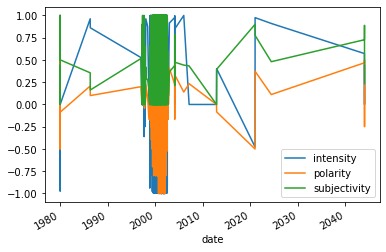

In [16]:
ts.drop(columns = ['month', 'year']).plot()

In [13]:
ts.index.dtype

datetime64[ns, UTC]

In [14]:
ts.index[0]

Timestamp('1980-01-01 00:00:00+0000', tz='UTC')

<AxesSubplot:xlabel='date'>

<Figure size 720x720 with 0 Axes>

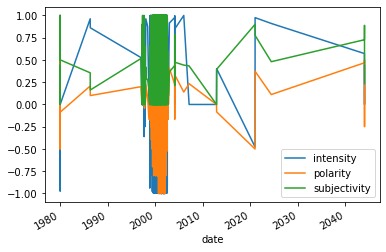

<Figure size 720x720 with 0 Axes>

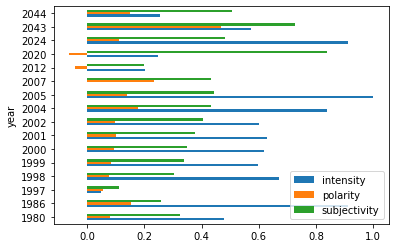

In [19]:
plt.figure(figsize = (10, 10))
ts.groupby('year')[['intensity', 'polarity', 'subjectivity']].mean().sort_index().plot.barh()
plt.show()

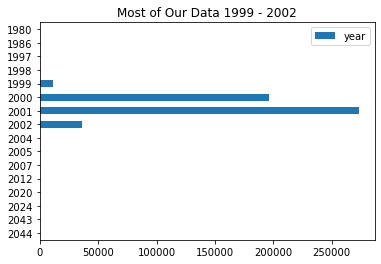

In [40]:
pd.DataFrame(ts.year.value_counts()).sort_index(ascending = False).plot.barh()
plt.title('Most of Our Data 1999 - 2002')
plt.show()

In [41]:
pd.DataFrame(round(ts.year.value_counts(normalize = True)*100, 4)).sort_index()

,year
1980,0.1009
1986,0.0004
1997,0.0845
1998,0.0342
1999,2.1538
2000,37.9010
2001,52.7568
2002,6.9528
2004,0.0135
2005,0.0002


<AxesSubplot:>

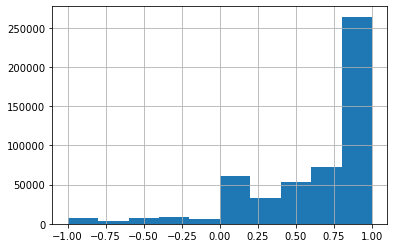

In [42]:
ts.intensity.hist()

In [43]:
ts.head()

,intensity,polarity,subjectivity,year,month
date,,,,,
1980-01-01 00:00:00+00:00,0.6124,-0.104861,0.431250,1980,1
1980-01-01 00:00:00+00:00,0.0000,0.000000,0.000000,1980,1
1980-01-01 00:00:00+00:00,0.9943,0.278879,0.575575,1980,1
1980-01-01 00:00:00+00:00,0.6908,0.008333,0.633333,1980,1
1980-01-01 00:00:00+00:00,0.7184,0.043810,0.373810,1980,1


In [44]:
df.head()

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
0,allen-p/_sent_mail/1.,,phillip.allen@enron.com,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,here is our forecast,here is our forecast,forecast,forecast,0.0000,0.00,0.000000,False,True
1,allen-p/_sent_mail/10.,Re:,phillip.allen@enron.com,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True
2,allen-p/_sent_mail/100.,Re: test,phillip.allen@enron.com,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,test successful way to go,test successful way to go,test successful way go,test successful way go,0.5859,0.75,0.950000,False,True
3,allen-p/_sent_mail/1000.,,phillip.allen@enron.com,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",randy can you send me a schedule of the sala...,randy can you send me a schedule of the salary...,randy send schedule salary level everyone sche...,randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True
4,allen-p/_sent_mail/1001.,Re: Hello,phillip.allen@enron.com,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True


In [48]:
df['year'] = ts.year.reset_index()['year']

df.head()

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal,year
0,allen-p/_sent_mail/1.,,phillip.allen@enron.com,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,here is our forecast,here is our forecast,forecast,forecast,0.0000,0.00,0.000000,False,True,1980
1,allen-p/_sent_mail/10.,Re:,phillip.allen@enron.com,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True,1980
2,allen-p/_sent_mail/100.,Re: test,phillip.allen@enron.com,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,test successful way to go,test successful way to go,test successful way go,test successful way go,0.5859,0.75,0.950000,False,True,1980
3,allen-p/_sent_mail/1000.,,phillip.allen@enron.com,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",randy can you send me a schedule of the sala...,randy can you send me a schedule of the salary...,randy send schedule salary level everyone sche...,randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True,1980
4,allen-p/_sent_mail/1001.,Re: Hello,phillip.allen@enron.com,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True,1980


In [26]:
df[df.is_poi == True].intensity.mean()

0.6436271374798389

In [36]:
def avg_score(df, filter_, measure):
    '''
    
    '''
    
    avg_score = df[filter_][measure].mean()
    
    return avg_score

In [37]:
avg_score(df, df.is_poi == True, 'intensity')

0.6436271374798389

In [38]:
avg_score(df, df.is_poi == False, 'intensity')

0.6207405031438705

In [49]:
avg_score(df, (df.is_poi == True) & (df.year == 2001), 'intensity')

0.6957893805309738

In [50]:
avg_score(df, (df.is_poi == False) & (df.year == 2001), 'intensity')

0.6290278269500146

In [51]:
avg_score(df, (df.is_poi == True) & (df.year == 2000), 'intensity')

0.6352135014505709

In [108]:
avgs = df.groupby('year').mean()
# avgs = avgs[(avgs.index < 2003) & (avgs.index > 1998)]
avgs = avgs[avgs.index < 2005]
avgs

,intensity,polarity,subjectivity,is_poi,is_internal
year,,,,,
1980,0.432761,0.071073,0.313493,0.000000,1.000000
1986,0.769950,0.008604,0.554221,0.000000,1.000000
1997,0.466810,0.094747,0.321183,0.000000,0.938215
1998,0.445516,0.049697,0.320582,0.005650,0.988701
1999,0.549134,0.075272,0.361843,0.002423,0.856156
2000,0.620058,0.097021,0.361762,0.022851,0.815574
2001,0.629249,0.098973,0.371411,0.003312,0.833982
2002,0.591121,0.096951,0.373393,0.004614,0.819286
2004,0.624813,0.083468,0.414091,0.000000,1.000000


In [109]:
cols = avgs.columns[0:3]
cols

Index(['intensity', 'polarity', 'subjectivity'], dtype='object')

In [110]:
labs = cols.values.tolist()
labs

['intensity', 'polarity', 'subjectivity']

In [111]:
x = avgs.index.values.tolist()
x

[1980, 1986, 1997, 1998, 1999, 2000, 2001, 2002, 2004]

In [112]:
y_intensity = avgs[cols[0]].values.tolist()
y_intensity

[0.4327609195402304,
 0.76995,
 0.4668102974828374,
 0.445515819209039,
 0.5491337311557882,
 0.6200577072921764,
 0.6292489273311561,
 0.5911214794017995,
 0.6248128571428573]

In [113]:
y_polarity = avgs[cols[1]].values.tolist()
y_polarity

[0.07107277255949893,
 0.0086038961038961,
 0.09474675453516088,
 0.04969733833614939,
 0.07527206192534155,
 0.09702054485354027,
 0.09897333197256485,
 0.09695062139534871,
 0.0834682408387137]

In [114]:
y_subjectivity = avgs[cols[2]].values.tolist()
y_subjectivity

[0.31349268372320555,
 0.5542207792207792,
 0.3211830243113354,
 0.3205815876883929,
 0.36184275873087013,
 0.3617617791463612,
 0.3714107587485667,
 0.37339310437933315,
 0.41409092360616234]

([<matplotlib.axis.XTick at 0x7ffba85e1070>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

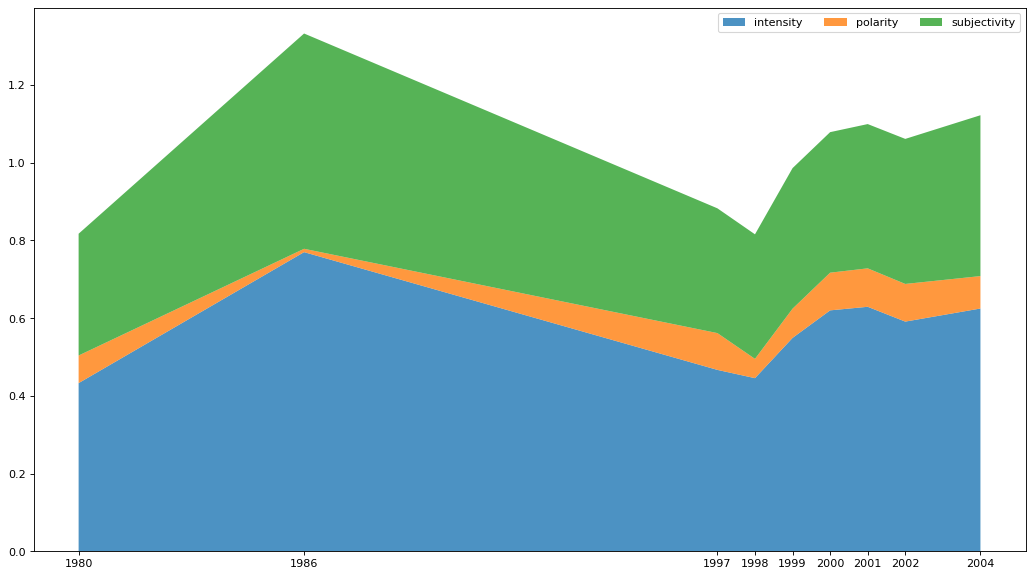

In [121]:
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)

y = np.vstack([y_intensity, y_polarity, y_subjectivity])
ax = plt.gca()
ax.stackplot(x, y, labels=labs, alpha=0.8)
ax.legend(fontsize=10, ncol=4)
plt.xticks(x, fontsize=10, horizontalalignment='center')


In [124]:
avgs.index.reset

Int64Index([1980, 1986, 1997, 1998, 1999, 2000, 2001, 2002, 2004], dtype='int64', name='year')

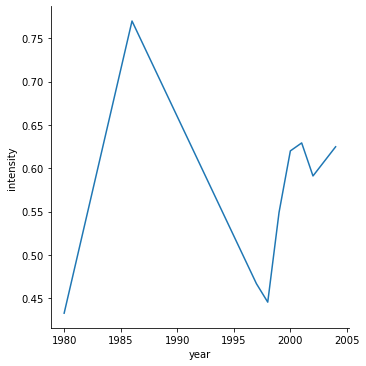

In [131]:
sns.relplot(x="year", y="intensity", data=avgs.reset_index(), kind = 'line')

In [132]:
df.head(2)

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal,year
0,allen-p/_sent_mail/1.,,phillip.allen@enron.com,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,here is our forecast,here is our forecast,forecast,forecast,0.0000,0.00,0.000000,False,True,1980
1,allen-p/_sent_mail/10.,Re:,phillip.allen@enron.com,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True,1980


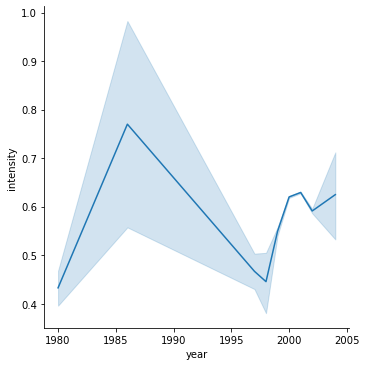

In [135]:
sns.relplot(data = df[df.year < 2005], x = 'year', y = 'intensity', kind = 'line')

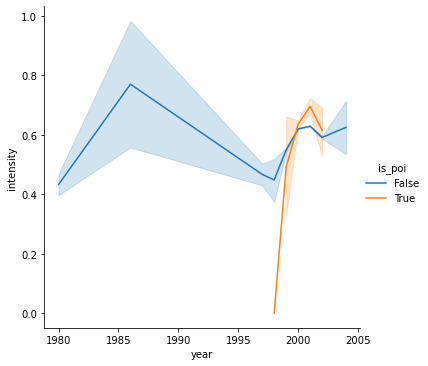

In [136]:
sns.relplot(data = df[df.year < 2005], x = 'year', y = 'intensity', kind = 'line', hue = 'is_poi')

In [144]:
df[df.is_poi == True].year.value_counts().sort_index()

1998       1
1999      27
2000    4481
2001     904
2002     166
Name: year, dtype: int64

<AxesSubplot:>

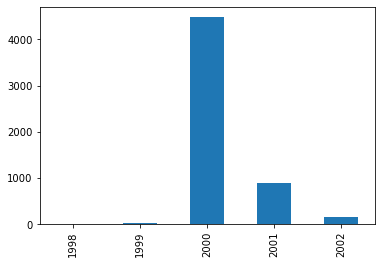

In [140]:
df[df.is_poi == True].year.value_counts().sort_index().plot.bar()

<AxesSubplot:>

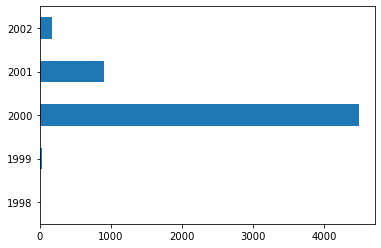

In [145]:
df[df.is_poi == True].year.value_counts().sort_index().plot.barh()

<AxesSubplot:>

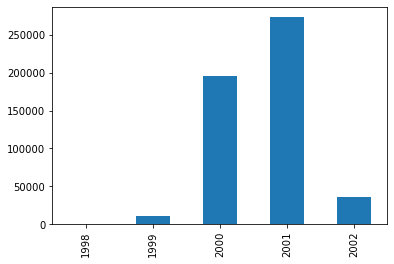

In [146]:
df[(df.year >= 1998) & (df.year <= 2002)].year.value_counts().sort_index().plot.bar()

In [157]:
years = list(df[(df.year >= 1998) & (df.year <= 2002)].year.unique())
years

[1998, 1999, 2000, 2001, 2002]

In [180]:
df['year_'] = df.year.astype(str)

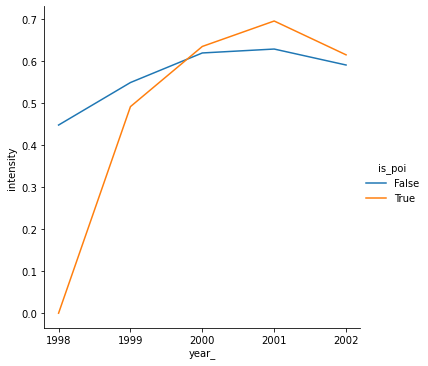

In [182]:
g = sns.relplot(data = df[(df.year >= 1998) & (df.year <= 2002)], x = 'year_', y = 'intensity', \
            kind = 'line', hue = 'is_poi', ci = None)

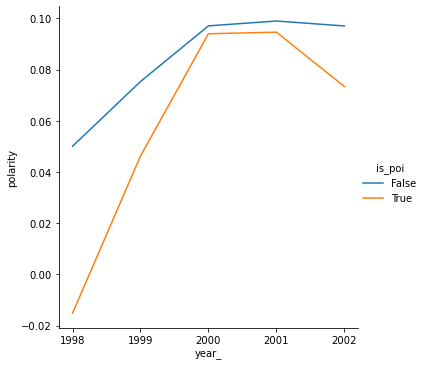

In [181]:
g = sns.relplot(data = df[(df.year >= 1998) & (df.year <= 2002)], x = 'year_', y = 'polarity', \
            kind = 'line', hue = 'is_poi', ci = None)

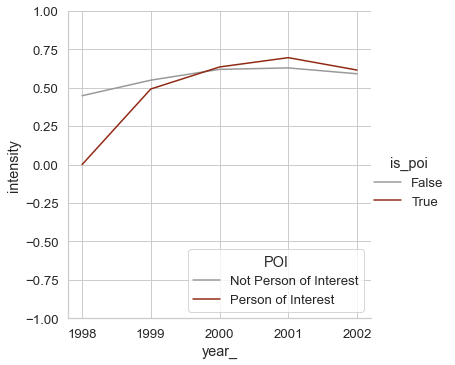

In [213]:
sns.set_style("whitegrid")
# sns.set(font_scale = 1.2)

sns.relplot(data = df[(df.year >= 1998) & (df.year <= 2002)], x = 'year_', y = 'intensity', \
            kind = 'line', hue = 'is_poi', ci = None, palette = ['#999999ff', '#912a15ff'])
plt.legend(loc='lower right', title = 'POI', labels = ['Not Person of Interest', 'Person of Interest'])
plt.ylim((-1, 1))
plt.show()

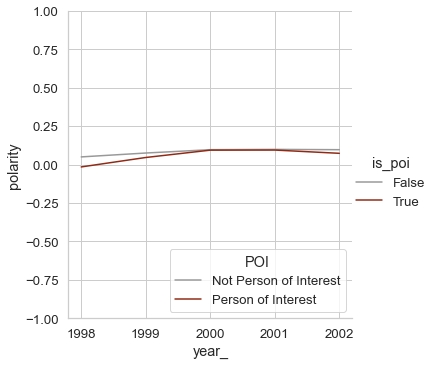

In [211]:
sns.relplot(data = df[(df.year >= 1998) & (df.year <= 2002)], x = 'year_', y = 'polarity', \
            kind = 'line', hue = 'is_poi', ci = None, palette = ['#999999ff', '#912a15ff'])
plt.legend(loc='lower right', title = 'POI', labels = ['Not Person of Interest', 'Person of Interest'])
plt.ylim((-1, 1))
plt.show()

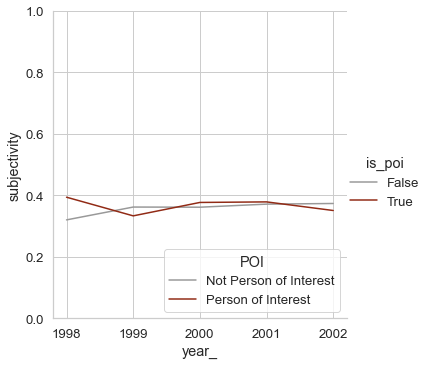

In [210]:
sns.relplot(data = df[(df.year >= 1998) & (df.year <= 2002)], x = 'year_', y = 'subjectivity', \
            kind = 'line', hue = 'is_poi', ci = None, palette = ['#999999ff', '#912a15ff'])
plt.legend(loc='lower right', title = 'POI', labels = ['Not Person of Interest', 'Person of Interest'])
plt.ylim((0, 1))
plt.show()

In [250]:
from scipy import stats


def correlation_exploration(df, x_string, y_string):
    '''
    This nifty function takes in a df, a string for x variable,
    and a string for y variable and displays their correlation.
    '''
    r, p = stats.pearsonr(df[x_string], df[y_string])
    
    df.plot.scatter(x_string, y_string, color = '#999999ff')
    sns.regplot(data = df, x= x_string, y= y_string)
    plt.title(f"{x_string.upper()}'s Relationship with {y_string.upper()}\n\n")
    
    print(f'The Correlation Coefficient is: {round(r, 2)}. There is {round(p,3)}% chance that we see these results by chance.')
#     print(f'r = {round(r, 2)}')

    plt.show()

The Correlation Coefficient is: 0.01. There is 0.0% chance that we see these results by chance.


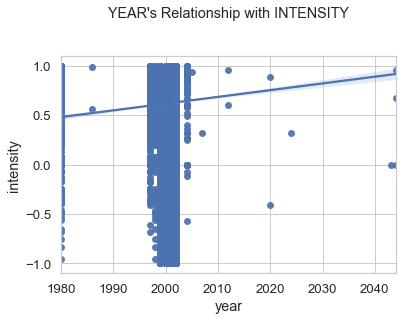

In [251]:
correlation_exploration(df, 'year', 'intensity')

The Correlation Coefficient is: 0.01. There is 0.0% chance that we see these results by chance.


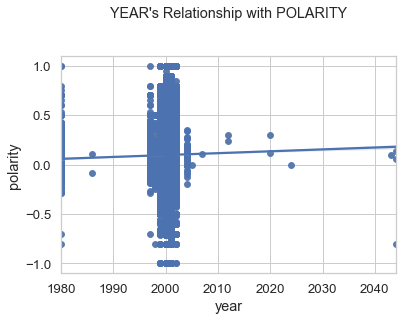

In [252]:
correlation_exploration(df, 'year', 'polarity')

The Correlation Coefficient is: 0.02. There is 0.0% chance that we see these results by chance.


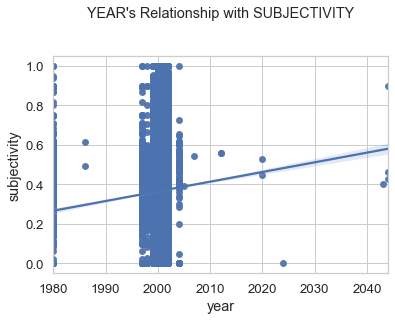

In [253]:
correlation_exploration(df, 'year', 'subjectivity')

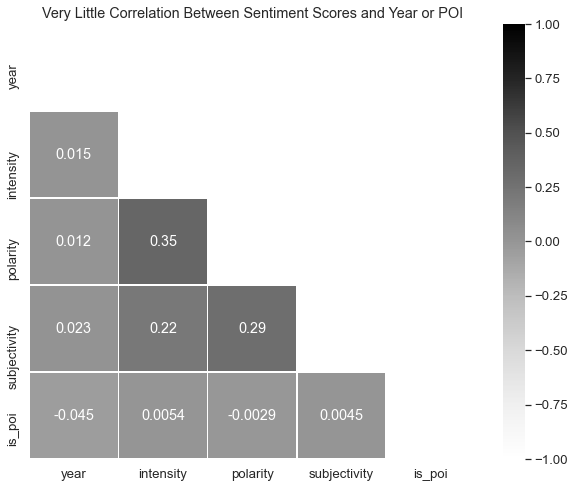

In [262]:
corr_table =  df[['year', 'intensity', 'polarity', 'subjectivity', 'is_poi']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_table, cmap='Greys', annot=True, linewidth=0.5, mask= np.triu(corr_table), vmin = -1, vmax = 1)
plt.title('Very Little Correlation Between Sentiment Scores and Year or POI')
plt.show()

In [264]:
df.year.value_counts().sort_index()

1980       522
1986         2
1997       437
1998       177
1999     11144
2000    196100
2001    272964
2002     35974
2004        70
2005         1
2007         1
2012         2
2020         2
2024         1
2043         1
2044         3
Name: year, dtype: int64

In [268]:
df[df.year == 1986]

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal,year,year_
522,allen-p/_sent_mail/574.,Re: SM134,phillip.allen@enron.com,"Tue, 9 Jan 2001 09:51:00 -0800 (PST)","George,\n\nHere is a spreadsheet that illustra...",george here is a spreadsheet that illustrates...,george here is a spreadsheet that illustrates ...,george spreadsheet illustrates payout investme...,george spreadsheet illustrates payout investme...,0.9825,0.106818,0.616667,False,True,1986,1986
523,allen-p/_sent_mail/575.,,phillip.allen@enron.com,"Tue, 9 Jan 2001 03:06:00 -0800 (PST)","Lucy,\n\nHere is a schedule of the most recent...",lucy here is a schedule of the most recent ut...,lucy here is a schedule of the most recent uti...,lucy schedule recent utility bills overages al...,lucy schedule recent utility bill overage alot...,0.5574,-0.089610,0.491775,False,True,1986,1986


In [267]:
df.content[522]

"George,\n\nHere is a spreadsheet that illustrates the payout of investment and builders \nprofit.  Check my math, but it looks like all the builders profit would be \nrecouped in the first year of operation.  At permanent financing $1.1 would \nbe paid, leaving only .3 to pay out in the 1st year.\n\n\n\nSince almost 80% of builders profit is repaid at the same time as the \ninvestment, I feel the 65/35 is a fair split.  However, as I mentioned \nearlier, I think we should negotiate to layer on additional equity to you as \npart of the construction contract.  \n\nJust to begin the brainstorming on what a construction agreement might look \nlike here are a few ideas:\n\n 1.  Fixed construction profit of $1.4 million.  Builder doesn't benefit from \nhigher cost, rather suffers as an equity holder.\n\n 2.  +5% equity for meeting time and costs in original plan ($51/sq ft, phase \n1 complete in November)\n      +5% equity for under budget and ahead of schedule\n      -5% equity for over bu

In [272]:
df.groupby('sender').mean().sort_values(by = 'intensity')

,intensity,polarity,subjectivity,is_poi,is_internal,year
sender,,,,,,
ihrke@mindspring.com,-0.9993,-0.012592,0.410386,False,False,2001.0
japhet@u.washington.edu,-0.9980,-0.320885,0.672907,False,False,2001.0
cabel@ect.enron.com,-0.9979,0.050486,0.442127,False,False,2001.0
vanguard@thevanguard.org,-0.9969,0.011897,0.383230,False,False,2001.0
mkopinski@prodigy.net,-0.9959,-0.025715,0.413935,False,False,2001.0
...,...,...,...,...,...,...
6.979.74-k8cqscl4n6aqwdrr.1@mail3.travelocity.com,0.9999,0.310330,0.451792,False,False,2000.0
6.977.56--6aconfo9suf.1@mail3.travelocity.com,0.9999,0.295641,0.446299,False,False,2000.0
info@tbls.org,0.9999,0.089062,0.395313,False,False,2001.0


In [289]:
df[df.sender == 'ihrke@mindspring.com']

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal,year,year_
371691,ring-r/personalfolder/57.,Fw: Worth a read (if you have time),ihrke@mindspring.com,"Sat, 15 Sep 2001 21:38:45 -0700 (PDT)",The articles below provide excellent commentar...,the articles below provide excellent commentar...,the articles below provide excellent commentar...,articles provide excellent commentary whether ...,article provide excellent commentary whether l...,-0.9993,-0.012592,0.410386,False,False,2001,2001


In [288]:
print(df.content[371691])

The articles below provide excellent commentary on what we are up against. =
 Whether we like it or not history is littered with fallen empires and nati=
ons who have persecuted the Jews.  Israel, unlike us, at least until now, u=
nderstands that it is in a war; a war for it's very survival; a war against=
 those who openly state that they do not consider Israel to have the right =
to even exist.  But we know from the Bible that Israel will always exist an=
d those who help the Jews, God will bless and those who hate the Jews, God =
will punish.  And even though we don't always agree with what Israel does, =
they are our friends, they know how to fight, and they are our allies in th=
is War.
=20
Israel knows they are in a fight for their very existence.  The same enemy =
of the Jews hates America.  They hate America and the West for the very rea=
sons outlined in the article below.  They are and have been openly at war w=
ith us for years.  Every American better understand that now! An